In [8]:
import pandas as pd

# Especifica la ruta del archivo CSV en tu carpeta de trabajo
ruta_archivo = 'nombre_del_archivo.csv'

# Utiliza la función read_csv() para leer los datos en un DataFrame
df = pd.read_csv("Internet_BAF.csv")

# Ahora puedes trabajar con los datos en el DataFrame
# Por ejemplo, puedes imprimir las primeras filas del DataFrame
df.head(30)


,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,3,Buenos Aires,4.715.469,6.199,4.721.668
1,2022,3,Capital Federal,1.545.534,2.145,1.547.679
2,2022,3,Catamarca,70.292,1,70.293
3,2022,3,Chaco,144.141,5,144.146
4,2022,3,Chubut,164.874,904,165.778
5,2022,3,Córdoba,1.038.600,68,1.038.668
6,2022,3,Corrientes,144.842,4,144.846
7,2022,3,Entre Ríos,268.937,22,268.959
8,2022,3,Formosa,68.537,1,68.538
9,2022,3,Jujuy,118.823,- 0,118.823


In [5]:
import pandas as pd

# Obtén el tamaño del DataFrame
filas, columnas = df.shape
print("Número de filas:", filas)
print("Número de columnas:", columnas)


Número de filas: 840
Número de columnas: 6


In [6]:
# Verificar si hay provincias repetidas
provincias_repetidas = df['Provincia'].duplicated()
df_repetidas = df[provincias_repetidas]
print("Provincias repetidas:\n", df_repetidas)

# Contar el número de provincias distintas
num_provincias = df['Provincia'].nunique()
print("Número de provincias distintas:", num_provincias)


Provincias repetidas:
       Año  Trimestre            Provincia Banda ancha fija Dial up      Total
24   2022          2         Buenos Aires        4.660.984   6.199  4.667.183
25   2022          2      Capital Federal        1.534.626   2.145  1.536.771
26   2022          2            Catamarca           67.007       1     67.008
27   2022          2                Chaco          143.559       5    143.564
28   2022          2               Chubut          161.901     904    162.805
..    ...        ...                  ...              ...     ...        ...
835  2014          1           Santa Cruz           26.304     460     26.764
836  2014          1             Santa Fe          506.000     612    506.612
837  2014          1  Santiago Del Estero           37.124       9     37.133
838  2014          1     Tierra Del Fuego           27.272     766     28.038
839  2014          1              Tucumán          129.944      88    130.032

[816 rows x 6 columns]
Número de provinc

In [7]:
provincias_diferentes = df['Provincia'].unique()
print("Provincias diferentes:", provincias_diferentes)


Provincias diferentes: ['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán']


In [9]:
num_trimestres = df['Trimestre'].nunique()
print("Número de trimestres diferentes:", num_trimestres)


Número de trimestres diferentes: 4


In [10]:
import pandas as pd

# Agrupar por provincia y año, y seleccionar el dato del primer trimestre (1)
df_agrupado = df.groupby(['Provincia', 'Año'])['Banda ancha fija'].first().reset_index()

# Imprimir el resultado
print(df_agrupado)


        Provincia   Año Banda ancha fija
0    Buenos Aires  2014        2.801.178
1    Buenos Aires  2015        2.946.743
2    Buenos Aires  2016        3.131.499
3    Buenos Aires  2017        3.171.206
4    Buenos Aires  2018        3.626.502
..            ...   ...              ...
211       Tucumán  2018          171.972
212       Tucumán  2019          198.621
213       Tucumán  2020          231.067
214       Tucumán  2021          238.609
215       Tucumán  2022          263.087

[216 rows x 3 columns]


In [12]:
df_agrupado

,Provincia,Año,Banda ancha fija
0,Buenos Aires,2014,2.801.178
1,Buenos Aires,2015,2.946.743
2,Buenos Aires,2016,3.131.499
3,Buenos Aires,2017,3.171.206
4,Buenos Aires,2018,3.626.502
...,...,...,...
211,Tucumán,2018,171.972
212,Tucumán,2019,198.621
213,Tucumán,2020,231.067
214,Tucumán,2021,238.609


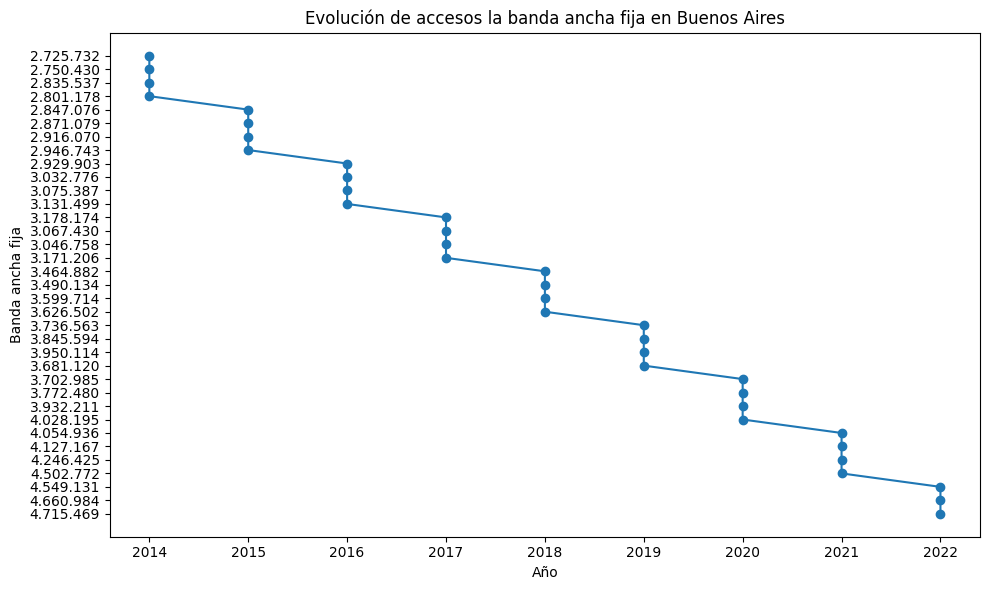

In [20]:
import matplotlib.pyplot as plt

# Filtrar los datos solo para la provincia de Buenos Aires
df_buenos_aires = df[df['Provincia'] == 'Buenos Aires']

# Configurar el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(df_buenos_aires['Año'], df_buenos_aires['Banda ancha fija'], marker='o')

# Configurar las etiquetas del eje x y el título
plt.xlabel('Año')
plt.ylabel('Banda ancha fija')
plt.title('Evolución de accesos la banda ancha fija en Buenos Aires')

plt.tight_layout()
plt.show()


C:\Users\Juan Manuel\AppData\Local\Temp\ipykernel_19676\1871210106.py:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


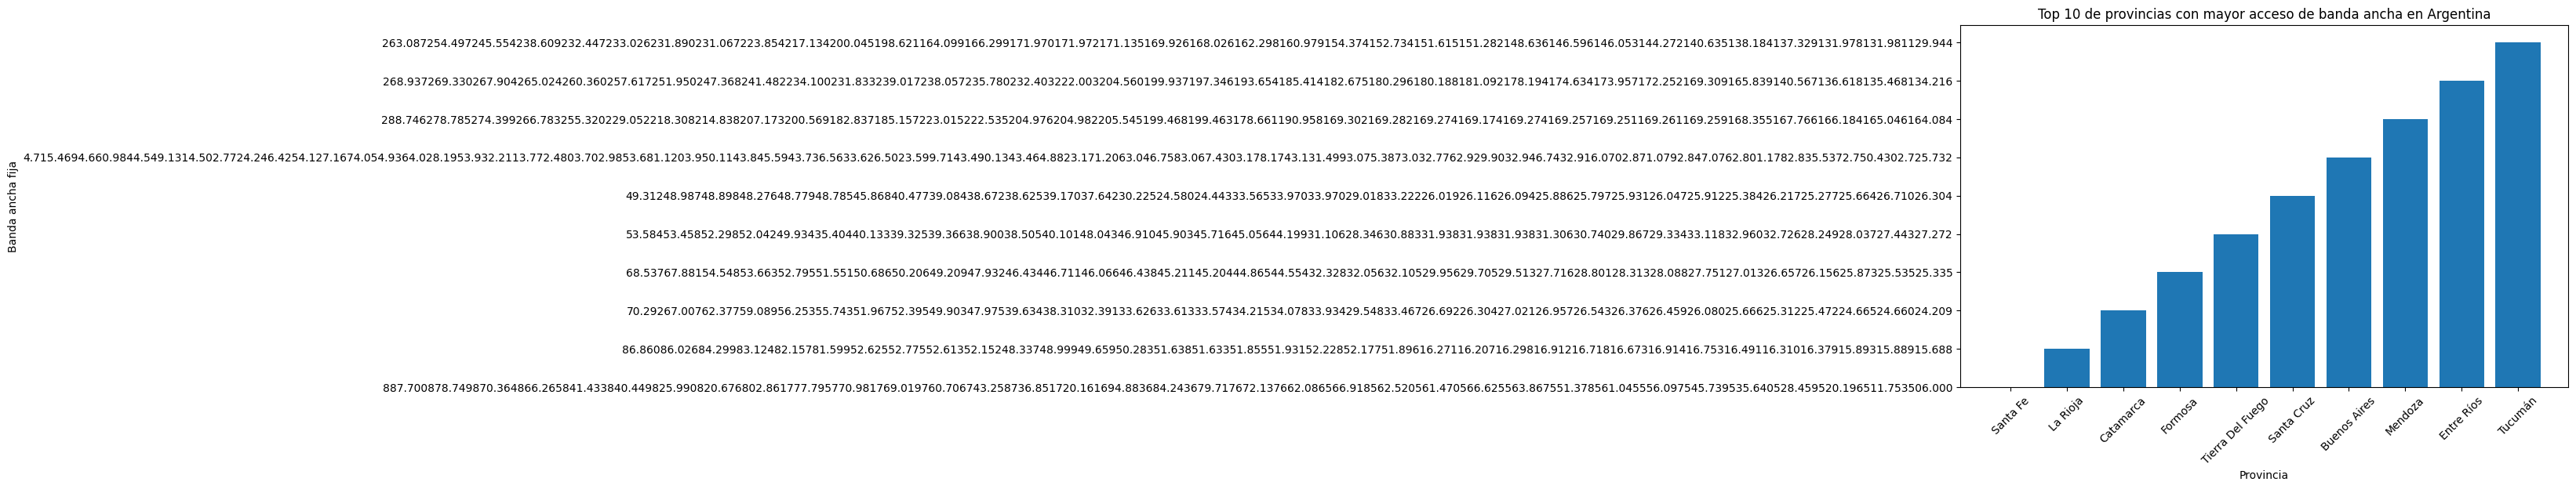

In [22]:
import matplotlib.pyplot as plt

# Calcular la suma de la banda ancha fija para cada provincia en todos los años
df_suma = df.groupby('Provincia')['Banda ancha fija'].sum().reset_index()

# Ordenar las provincias en función de la suma de la banda ancha fija en orden descendente
df_ordenado = df_suma.sort_values('Banda ancha fija', ascending=False)

# Seleccionar las 10 provincias principales
top_10_provincias = df_ordenado.head(10)

# Configurar el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10_provincias['Provincia'], top_10_provincias['Banda ancha fija'])

# Configurar las etiquetas del eje x y el título
plt.xlabel('Provincia')
plt.ylabel('Banda ancha fija')
plt.title('Top 10 de provincias con mayor acceso de banda ancha en Argentina')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
import matplotlib.pyplot as plt

# Calcular la suma de la banda ancha fija para cada provincia en todos los años
df_suma = df.groupby('Provincia')['Banda ancha fija'].sum().reset_index()

# Ordenar las provincias en función de la suma de la banda ancha fija en orden descendente
df_ordenado = df_suma.sort_values('Banda ancha fija', ascending=False)

# Seleccionar las 10 provincias principales
top_10_provincias = df_ordenado.head(10)

# Redondear la suma de la banda ancha fija a un solo dato numérico
top_10_provincias['Banda ancha fija'] = top_10_provincias['Banda ancha fija'].round(2)

# Configurar el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10_provincias['Provincia'], top_10_provincias['Banda ancha fija'])

# Configurar las etiquetas del eje x y el título
plt.xlabel('Provincia')
plt.ylabel('Banda ancha fija')
plt.title('Top 10 de provincias con mayor acceso de banda ancha en Argentina')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


TypeError: can't multiply sequence by non-int of type 'float'

In [24]:
import matplotlib.pyplot as plt

# Calcular la suma de la banda ancha fija para cada provincia en todos los años
df_suma = df.groupby('Provincia')['Banda ancha fija'].sum().reset_index()

# Ordenar las provincias en función de la suma de la banda ancha fija en orden descendente
df_ordenado = df_suma.sort_values('Banda ancha fija', ascending=False)

# Seleccionar las 10 provincias principales
top_10_provincias = df_ordenado.head(10)

# Convertir la columna "Banda ancha fija" a tipo numérico
top_10_provincias['Banda ancha fija'] = top_10_provincias['Banda ancha fija'].astype(float)

# Redondear la suma de la banda ancha fija a un solo dato numérico
top_10_provincias['Banda ancha fija'] = top_10_provincias['Banda ancha fija'].round(2)

# Configurar el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10_provincias['Provincia'], top_10_provincias['Banda ancha fija'])

# Configurar las etiquetas del eje x y el título
plt.xlabel('Provincia')
plt.ylabel('Banda ancha fija')
plt.title('Top 10 de provincias con mayor acceso de banda ancha en Argentina')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ValueError: could not convert string to float: '887.700878.749870.364866.265841.433840.449825.990820.676802.861777.795770.981769.019760.706743.258736.851720.161694.883684.243679.717672.137662.086566.918562.520561.470566.625563.867551.378561.045556.097545.739535.640528.459520.196511.753506.000'

C:\Users\Juan Manuel\AppData\Local\Temp\ipykernel_19676\1568858325.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_provincias['Banda ancha fija'] = top_10_provincias['Banda ancha fija'].apply(lambda x: re.sub(r'\D', '', x))
C:\Users\Juan Manuel\AppData\Local\Temp\ipykernel_19676\1568858325.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_provincias['Banda ancha fija'] = top_10_provincias['Banda ancha fija'].astype(float)
C:\Users\Juan Manuel\AppData\Local\Temp\ipykernel_19676\15688583

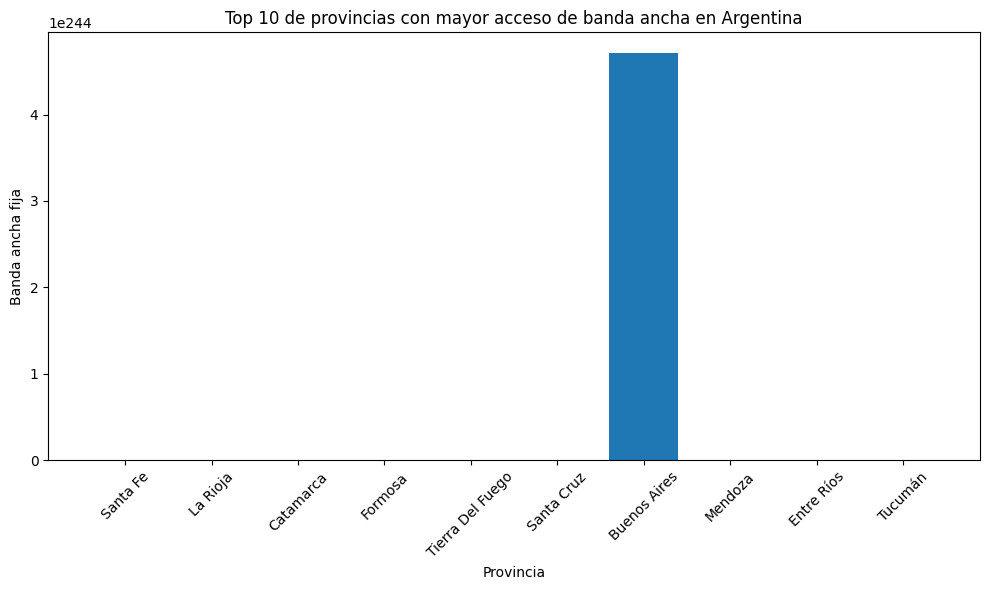

In [25]:
import matplotlib.pyplot as plt
import re

# Calcular la suma de la banda ancha fija para cada provincia en todos los años
df_suma = df.groupby('Provincia')['Banda ancha fija'].sum().reset_index()

# Ordenar las provincias en función de la suma de la banda ancha fija en orden descendente
df_ordenado = df_suma.sort_values('Banda ancha fija', ascending=False)

# Seleccionar las 10 provincias principales
top_10_provincias = df_ordenado.head(10)

# Limpiar los valores en la columna "Banda ancha fija"
top_10_provincias['Banda ancha fija'] = top_10_provincias['Banda ancha fija'].apply(lambda x: re.sub(r'\D', '', x))

# Convertir la columna "Banda ancha fija" a tipo numérico
top_10_provincias['Banda ancha fija'] = top_10_provincias['Banda ancha fija'].astype(float)

# Redondear la suma de la banda ancha fija a un solo dato numérico
top_10_provincias['Banda ancha fija'] = top_10_provincias['Banda ancha fija'].round(2)

# Configurar el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10_provincias['Provincia'], top_10_provincias['Banda ancha fija'])

# Configurar las etiquetas del eje x y el título
plt.xlabel('Provincia')
plt.ylabel('Banda ancha fija')
plt.title('Top 10 de provincias con mayor acceso de banda ancha en Argentina')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


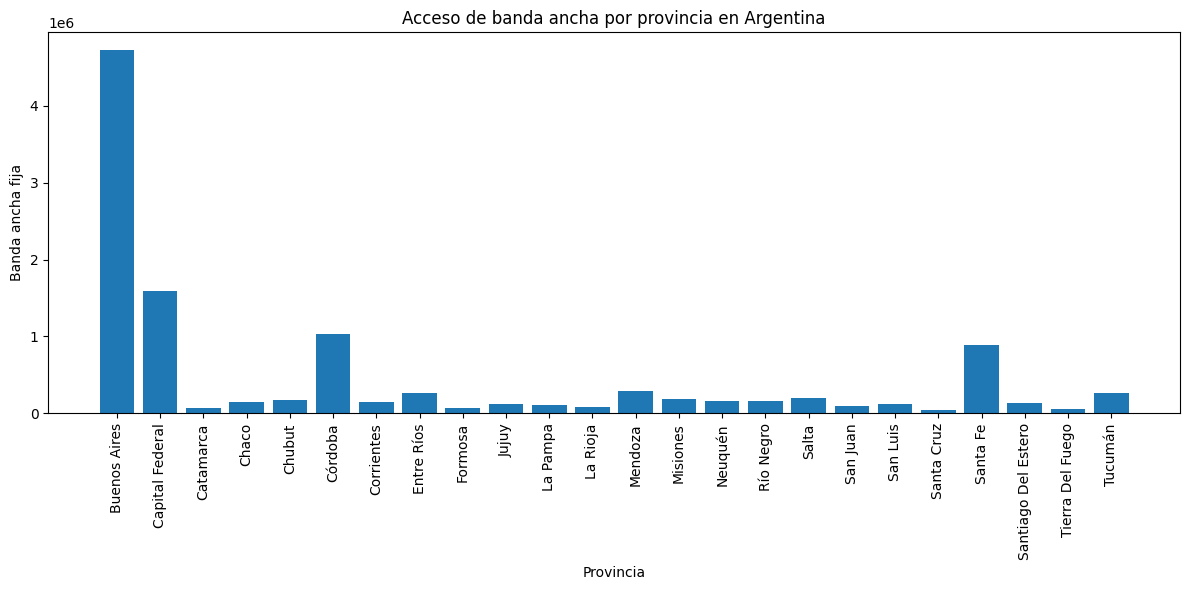

In [26]:
import matplotlib.pyplot as plt
import re

# Filtrar los datos solo para las provincias de Argentina
df_argentina = df[df['Provincia'] != 'Argentina']

# Limpiar los valores en la columna "Banda ancha fija"
df_argentina['Banda ancha fija'] = df_argentina['Banda ancha fija'].apply(lambda x: re.sub(r'\D', '', x))

# Convertir la columna "Banda ancha fija" a tipo numérico
df_argentina['Banda ancha fija'] = df_argentina['Banda ancha fija'].astype(float)

# Redondear la banda ancha fija a un solo dato numérico
df_argentina['Banda ancha fija'] = df_argentina['Banda ancha fija'].round(2)

# Configurar el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_argentina['Provincia'], df_argentina['Banda ancha fija'])

# Configurar las etiquetas del eje x y el título
plt.xlabel('Provincia')
plt.ylabel('Banda ancha fija')
plt.title('Acceso de banda ancha por provincia en Argentina')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


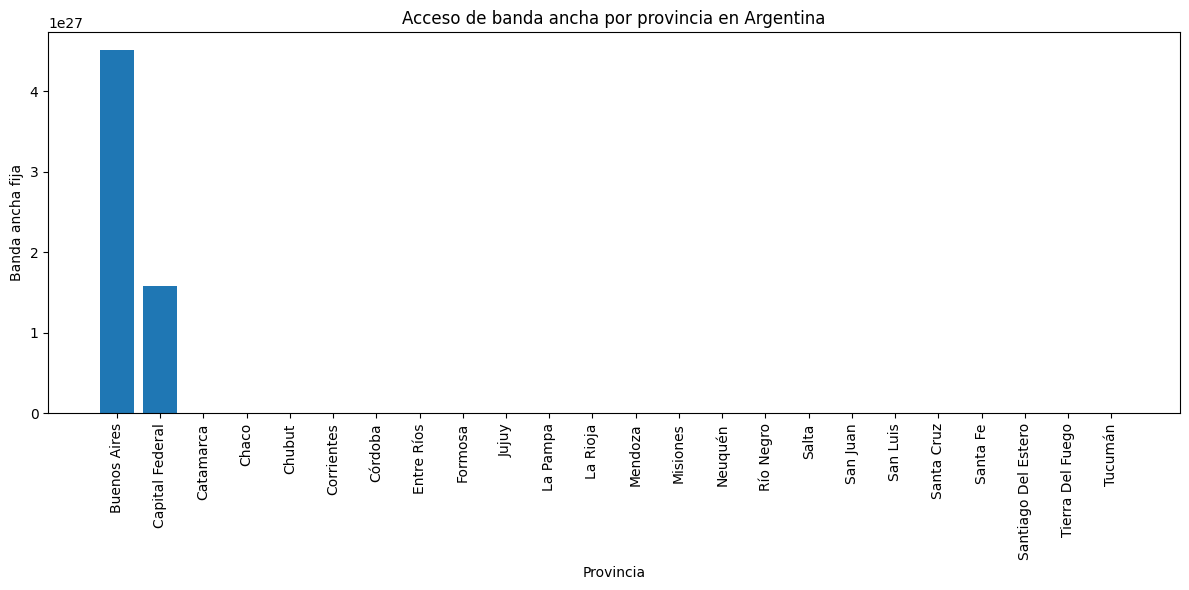

In [27]:
import matplotlib.pyplot as plt
import re

# Limpiar los valores en la columna "Banda ancha fija"
df_agrupado['Banda ancha fija'] = df_agrupado['Banda ancha fija'].apply(lambda x: re.sub(r'\D', '', x))

# Convertir la columna "Banda ancha fija" a tipo numérico
df_agrupado['Banda ancha fija'] = df_agrupado['Banda ancha fija'].astype(float)

# Redondear la banda ancha fija a un solo dato numérico
df_agrupado['Banda ancha fija'] = df_agrupado['Banda ancha fija'].round(2)

# Configurar el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_agrupado['Provincia'], df_agrupado['Banda ancha fija'])

# Configurar las etiquetas del eje x y el título
plt.xlabel('Provincia')
plt.ylabel('Banda ancha fija')
plt.title('Acceso de banda ancha por provincia en Argentina')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [28]:
import matplotlib.pyplot as plt
import re

# Limpiar los valores en la columna "Banda ancha fija"
df_agrupado['Banda ancha fija'] = df_agrupado['Banda ancha fija'].apply(lambda x: re.sub(r'\D', '', x))

# Convertir la columna "Banda ancha fija" a tipo numérico
df_agrupado['Banda ancha fija'] = df_agrupado['Banda ancha fija'].astype(float)

# Redondear la banda ancha fija a un solo dato numérico
df_agrupado['Banda ancha fija'] = df_agrupado['Banda ancha fija'].round(2)

# Configurar el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_agrupado.index, df_agrupado['Banda ancha fija'])

# Configurar las etiquetas del eje x y el título
plt.xlabel('Provincia')
plt.ylabel('Banda ancha fija')
plt.title('Acceso de banda ancha por provincia en Argentina')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


TypeError: expected string or bytes-like object, got 'float'

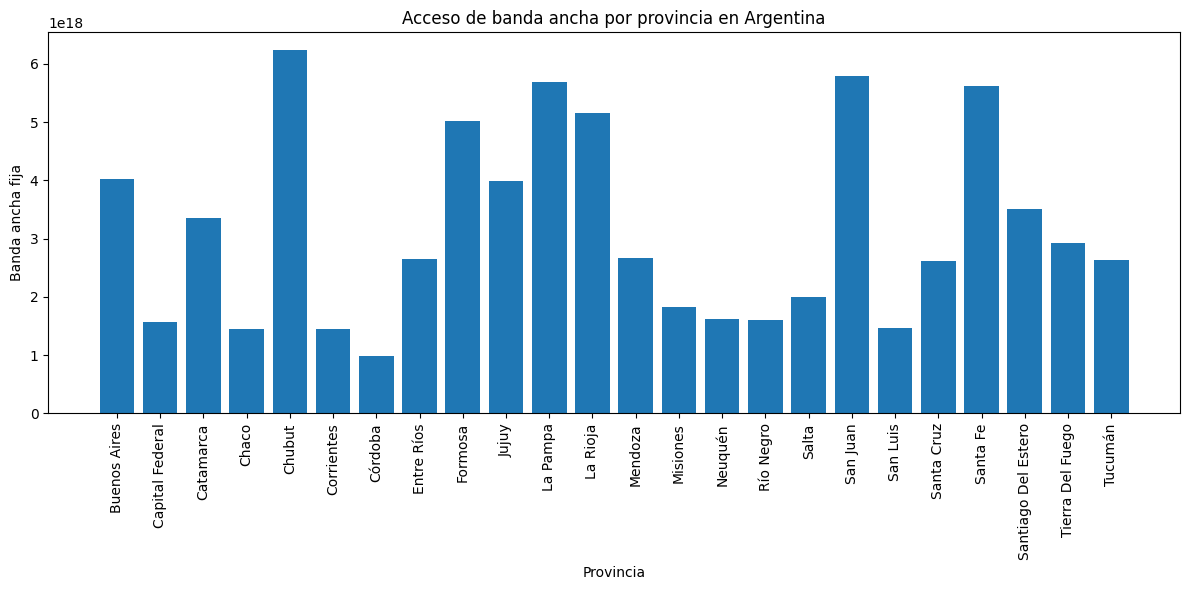

In [30]:
import matplotlib.pyplot as plt

# Configurar el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_agrupado['Provincia'], df_agrupado['Banda ancha fija'])

# Configurar las etiquetas del eje x y el título
plt.xlabel('Provincia')
plt.ylabel('Banda ancha fija')
plt.title('Acceso de banda ancha por provincia en Argentina')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


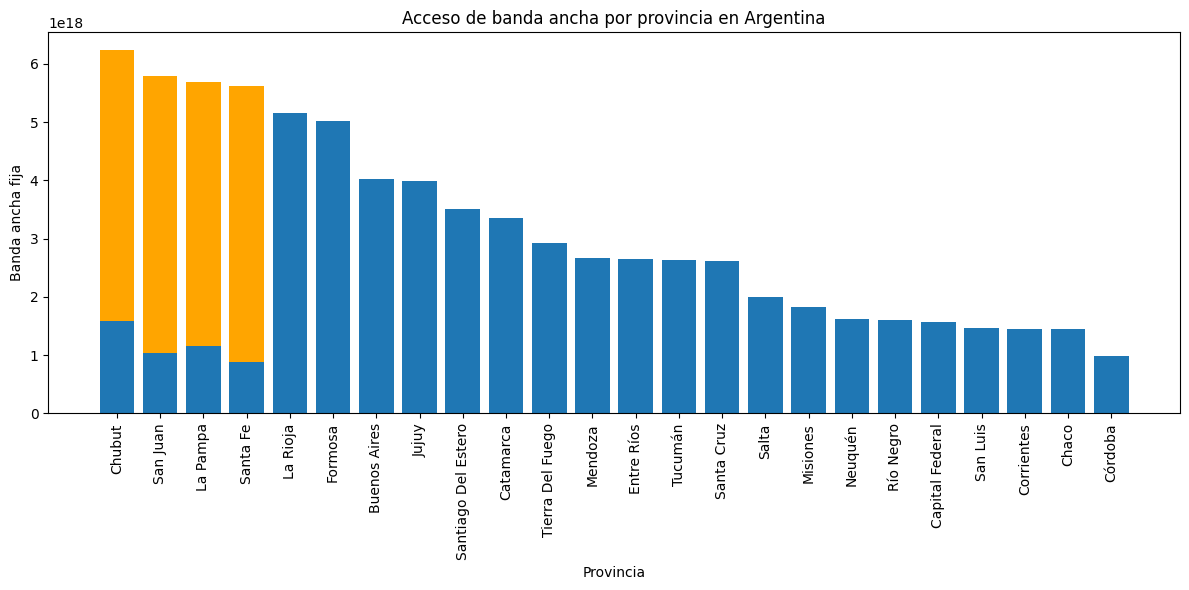

In [31]:
import matplotlib.pyplot as plt

# Ordenar las provincias en función de la banda ancha fija en orden descendente
df_sorted = df_agrupado.sort_values('Banda ancha fija', ascending=False)

# Obtener las 5 provincias con los valores más altos
top_5_provincias = df_sorted.head(5)

# Configurar el gráfico de barras
plt.figure(figsize=(12, 6))

# Configurar las barras para las 5 provincias principales con un color diferente
plt.bar(top_5_provincias['Provincia'], top_5_provincias['Banda ancha fija'], color='orange')

# Configurar las barras para las otras provincias
plt.bar(df_sorted['Provincia'][5:], df_sorted['Banda ancha fija'][5:])

# Configurar las etiquetas del eje x y el título
plt.xlabel('Provincia')
plt.ylabel('Banda ancha fija')
plt.title('Acceso de banda ancha por provincia en Argentina')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [33]:
import pandas as pd

# Especifica la ruta del archivo CSV en tu carpeta de trabajo
ruta_archivo = 'nombre_del_archivo.csv'

# Utiliza la función read_csv() para leer los datos en un DataFrame
df = pd.read_csv("Internet_Accesos-por-velocidad.csv")

# Ahora puedes trabajar con los datos en el DataFrame
# Por ejemplo, puedes imprimir las primeras filas del DataFrame
df.head(5)


,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
1,2022,3,Capital Federal,517.000,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679
2,2022,3,Catamarca,71.000,384.000,3.107,5.389,5.099,3.737,50.298,2.208,70.293
3,2022,3,Chaco,461.000,987.000,16.782,18.938,8.049,15.828,79.390,3.711,144.146
4,2022,3,Chubut,109.000,1.444,45.707,30.940,34.682,15.309,17.563,20.024,165.778


In [35]:
import pandas as pd

# Agrupar los datos por provincia y año y sumar los valores
df_agrupado = df.groupby(['Provincia', 'Año']).sum().reset_index()

# Imprimir el DataFrame agrupado
df_agrupado


C:\Users\Juan Manuel\AppData\Local\Temp\ipykernel_19676\534354865.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agrupado = df.groupby(['Provincia', 'Año']).sum().reset_index()


,Provincia,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,OTROS
0,Buenos Aires,2014,10,30.952,594.642,622.326,268.741,1730.000,0.000
1,Buenos Aires,2015,10,33.942,468.432,1000.697,727.559,10.048,0.000
2,Buenos Aires,2016,10,30.048,425.491,1422.330,1448.609,165.057,0.000
3,Buenos Aires,2017,10,24.007,237.847,1277.621,2485.488,659.948,114.182
4,Buenos Aires,2018,10,1128.196,310.340,973.420,2916.503,2863.343,358.764
...,...,...,...,...,...,...,...,...,...
211,Tucumán,2018,10,64.000,25.444,176.691,106.637,1790.302,94.610
212,Tucumán,2019,10,103.000,272.188,186.883,103.771,2324.405,0.000
213,Tucumán,2020,10,185.000,388.000,213.864,130.561,11.327,7.952
214,Tucumán,2021,10,132.000,388.000,204.093,91.996,19.836,409.360


In [36]:
import pandas as pd

# Agrupar los datos por provincia y año y sumar los valores de los trimestres
df_agrupado = df.groupby(['Provincia', 'Año']).sum().reset_index()

# Dividir las columnas de velocidad en 4 trimestres
columnas_trimestres = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', 'OTROS']

for trimestre in range(1, 5):
    columnas_trimestre_actual = [col + ' T' + str(trimestre) for col in columnas_trimestres]
    df_agrupado[columnas_trimestre_actual] = df[df['Trimestre'] == trimestre][columnas_trimestres].values

# Eliminar las columnas de los trimestres originales
df_agrupado = df_agrupado.drop(columns=['Trimestre', *columnas_trimestres])

# Imprimir el DataFrame agrupado por año y provincia
print(df_agrupado)


C:\Users\Juan Manuel\AppData\Local\Temp\ipykernel_19676\4204793173.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agrupado = df.groupby(['Provincia', 'Año']).sum().reset_index()


ValueError: Length of values (192) does not match length of index (216)

In [37]:
import pandas as pd

# Agrupar los datos por provincia y año y sumar los valores de los trimestres
df_agrupado = df.groupby(['Provincia', 'Año']).sum().reset_index()

# Dividir las columnas de velocidad en 4 trimestres
columnas_trimestres = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', 'OTROS']

df_trimestres = pd.DataFrame(columns=['Provincia', 'Año'])

for trimestre in range(1, 5):
    columnas_trimestre_actual = [col + ' T' + str(trimestre) for col in columnas_trimestres]
    df_trimestre_actual = df[df['Trimestre'] == trimestre][['Provincia', 'Año'] + columnas_trimestres]
    df_trimestre_actual.columns = ['Provincia', 'Año'] + columnas_trimestre_actual
    df_trimestres = pd.merge(df_trimestres, df_trimestre_actual, on=['Provincia', 'Año'], how='outer')

# Fusionar los DataFrames de trimestres con el DataFrame agrupado
df_agrupado = pd.merge(df_agrupado, df_trimestres


SyntaxError: incomplete input (891050446.py, line 18)

In [38]:
import pandas as pd

# Agrupar los datos por provincia y año y sumar los valores de los trimestres
df_agrupado = df.groupby(['Provincia', 'Año']).sum().reset_index()

# Dividir las columnas de velocidad en 4 trimestres
columnas_trimestres = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', 'OTROS']

df_trimestres = pd.DataFrame(columns=['Provincia', 'Año'])

for trimestre in range(1, 5):
    columnas_trimestre_actual = [col + ' T' + str(trimestre) for col in columnas_trimestres]
    df_trimestre_actual = df[df['Trimestre'] == trimestre][['Provincia', 'Año'] + columnas_trimestres]
    df_trimestre_actual.columns = ['Provincia', 'Año'] + columnas_trimestre_actual
    df_trimestres = pd.merge(df_trimestres,


SyntaxError: incomplete input (3278653205.py, line 15)

In [40]:
import pandas as pd

# Agrupar los datos por provincia y año y sumar los valores de los trimestres
df_agrupado = df.groupby(['Provincia', 'Año']).sum().reset_index()

# Dividir las columnas de velocidad en 4 trimestres
columnas_trimestres = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', 'OTROS']

df_trimestres = pd.DataFrame(columns=['Provincia', 'Año'])

for trimestre in range(1, 5):
    columnas_trimestre_actual = [col + ' T' + str(trimestre) for col in columnas_trimestres]
    df_trimestre_actual = df[df['Trimestre'] == trimestre][['Provincia', 'Año'] + columnas_trimestres]
    df_trimestre_actual.columns = ['Provincia', 'Año'] + columnas_trimestre_actual
    df_trimestres = pd.merge(df_trimestres, df_trimestre_actual, on=['Provincia', 'Año'], how='outer')

# Fusionar los DataFrames de trimestres con el DataFrame agrupado
df_agrupado = pd.merge(df_agrupado, df_trimestres, on=['Provincia', 'Año'])

# Eliminar las columnas de los trimestres originales
df_agrupado = df_agrupado.drop(columns=['Trimestre', *columnas_trimestres])

# Imprimir el DataFrame agrupado por año y provincia
df_agrupado


C:\Users\Juan Manuel\AppData\Local\Temp\ipykernel_19676\2642741319.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agrupado = df.groupby(['Provincia', 'Año']).sum().reset_index()


,Provincia,Año,HASTA 512 kbps T1,+ 512 Kbps - 1 Mbps T1,+ 6 Mbps - 10 Mbps T1,+ 10 Mbps - 20 Mbps T1,+ 20 Mbps - 30 Mbps T1,OTROS T1,HASTA 512 kbps T2,+ 512 Kbps - 1 Mbps T2,...,+ 6 Mbps - 10 Mbps T3,+ 10 Mbps - 20 Mbps T3,+ 20 Mbps - 30 Mbps T3,OTROS T3,HASTA 512 kbps T4,+ 512 Kbps - 1 Mbps T4,+ 6 Mbps - 10 Mbps T4,+ 10 Mbps - 20 Mbps T4,+ 20 Mbps - 30 Mbps T4,OTROS T4
0,Buenos Aires,2014,8.469,171.244,121.787,38.923,206.000,0.000,6.902,162.274,...,156.693,68.947,243.000,0.000,8.226,132.937,203.620,104.322,997.000,0.000
1,Buenos Aires,2015,8.882,123.589,220.070,126.958,1.561,0.000,8.714,137.189,...,262.564,200.491,2.642,0.000,7.985,100.303,274.560,240.188,3.835,0.000
2,Buenos Aires,2016,7.351,97.880,289.929,247.372,8.315,0.000,10.786,133.385,...,393.530,399.116,52.900,0.000,6.055,86.281,403.575,467.398,72.348,0.000
3,Buenos Aires,2017,6.017,83.918,402.315,523.540,90.937,0.000,7.548,47.472,...,311.652,676.137,140.812,0.000,3.865,55.046,264.645,712.513,335.140,114.182
4,Buenos Aires,2018,1.514,74.766,292.732,886.678,480.237,105.818,1.009,81.354,...,190.805,636.090,897.964,120.464,134.673,73.761,194.426,577.679,949.093,19.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Tucumán,2018,16.000,7.472,45.675,26.405,1.218,1.305,16.000,6.735,...,43.282,27.062,941.000,0.000,16.000,5.244,42.766,26.111,847.000,92.000
212,Tucumán,2019,16.000,5.188,42.877,26.210,847.000,0.000,16.000,157.000,...,47.693,24.354,843.000,0.000,55.000,0.000,52.017,28.916,6.405,0.000
213,Tucumán,2020,52.000,97.000,50.383,31.096,1.730,0.000,52.000,97.000,...,54.610,33.126,3.246,2.637,29.000,97.000,54.334,32.155,4.105,2.680
214,Tucumán,2021,29.000,97.000,53.416,25.255,4.188,2.680,32.000,97.000,...,50.293,21.986,5.300,164.000,39.000,97.000,48.736,21.023,5.326,240.000


In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for provincia in df_agrupado['Provincia'].unique():
    data = df_agrupado[df_agrupado['Provincia'] == provincia]
    plt.plot(data['Año'], data['Banda ancha fija'], label=provincia)

plt.xlabel('Año')
plt.ylabel('Banda ancha fija')
plt.title('Tendencia de Banda Ancha por Provincia')
plt.legend()
plt.show()


KeyError: 'Banda ancha fija'

<Figure size 1000x600 with 0 Axes>

In [42]:
print(df_agrupado.columns)


Index(['Provincia', 'Año', 'HASTA 512 kbps T1', '+ 512 Kbps - 1 Mbps T1',
       '+ 6 Mbps - 10 Mbps T1', '+ 10 Mbps - 20 Mbps T1',
       '+ 20 Mbps - 30 Mbps T1', 'OTROS T1', 'HASTA 512 kbps T2',
       '+ 512 Kbps - 1 Mbps T2', '+ 6 Mbps - 10 Mbps T2',
       '+ 10 Mbps - 20 Mbps T2', '+ 20 Mbps - 30 Mbps T2', 'OTROS T2',
       'HASTA 512 kbps T3', '+ 512 Kbps - 1 Mbps T3', '+ 6 Mbps - 10 Mbps T3',
       '+ 10 Mbps - 20 Mbps T3', '+ 20 Mbps - 30 Mbps T3', 'OTROS T3',
       'HASTA 512 kbps T4', '+ 512 Kbps - 1 Mbps T4', '+ 6 Mbps - 10 Mbps T4',
       '+ 10 Mbps - 20 Mbps T4', '+ 20 Mbps - 30 Mbps T4', 'OTROS T4'],
      dtype='object')


In [44]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame por la provincia de Buenos Aires
df_buenosaires = df_agrupado[df_agrupado['Provincia'] == 'Buenos Aires']

# Extraer las columnas de los diferentes rangos de velocidad
columnas_velocidad = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', 'OTROS']

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Generar el gráfico de barras para cada rango de velocidad
for columna in columnas_velocidad:
    plt.bar(df_buenosaires['Año'], df_buenosaires[columna], label=columna)

# Configurar el título y las etiquetas de los ejes
plt.title('Acceso a Banda Ancha en Buenos Aires por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accesos')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


KeyError: 'HASTA 512 kbps'

<Figure size 1000x600 with 0 Axes>

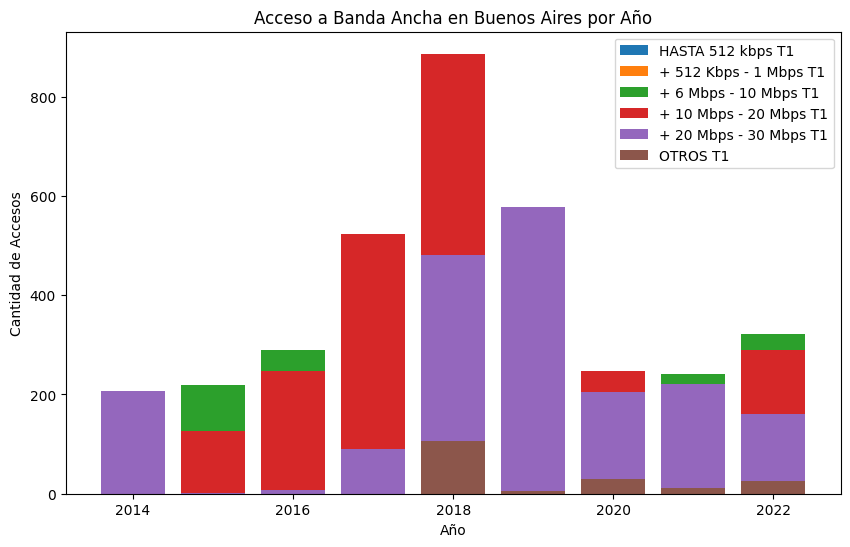

In [45]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame por la provincia de Buenos Aires
df_buenosaires = df_agrupado[df_agrupado['Provincia'] == 'Buenos Aires']

# Extraer las columnas de los diferentes rangos de velocidad
columnas_velocidad = ['HASTA 512 kbps T1', '+ 512 Kbps - 1 Mbps T1', '+ 6 Mbps - 10 Mbps T1', '+ 10 Mbps - 20 Mbps T1', '+ 20 Mbps - 30 Mbps T1', 'OTROS T1']

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Generar el gráfico de barras para cada rango de velocidad
for columna in columnas_velocidad:
    plt.bar(df_buenosaires['Año'], df_buenosaires[columna], label=columna)

# Configurar el título y las etiquetas de los ejes
plt.title('Acceso a Banda Ancha en Buenos Aires por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accesos')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


In [56]:
import pandas as pd

# Especifica la ruta del archivo CSV en tu carpeta de trabajo
ruta_archivo = 'nombre_del_archivo.csv'

# Utiliza la función read_csv() para leer los datos en un DataFrame
df = pd.read_csv("Listadodelocalidadesconconectividadainternet_2750221688857167301.csv")

# Ahora puedes trabajar con los datos en el DataFrame
# Por ejemplo, puedes imprimir las primeras filas del DataFrame
df.head(5)


,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,--,--,--,--,SI,SI,--,--,--
1,BUENOS AIRES,Bahía Blanca,Villa Espora,--,--,--,--,--,--,--,--,--
2,BUENOS AIRES,Balcarce,Balcarce,SI,SI,SI,SI,SI,SI,SI,SI,--
3,BUENOS AIRES,Balcarce,Los Pinos,--,--,--,--,--,--,SI,SI,--
4,BUENOS AIRES,Balcarce,Napaleofú,--,--,--,SI,SI,SI,SI,SI,--


In [57]:
conteo_tecnologias = df.groupby('Provincia').sum().sum(axis=1)
print(conteo_tecnologias)


Provincia
BUENOS AIRES           Bahía BlancaBahía BlancaBalcarceBalcarceBalcar...
CABA                   COMUNA 04COMUNA 10COMUNA 12COMUNA 05COMUNA 05C...
CATAMARCA              El AltoFray Mamerto EsquiúFray Mamerto EsquiúF...
CHACO                  San FernandoSan FernandoSan FernandoSan Lorenz...
CHUBUT                 FutaleufúFutaleufúFutaleufúFutaleufúGaimanGaim...
CORDOBA                Cruz del EjeCruz del EjeRío CuartoRío CuartoRí...
CORRIENTES             CapitalCapitalCapitalConcepciónConcepciónConce...
ENTRE RIOS             ColónColónColónColónParanáDiamanteDiamanteDiam...
FORMOSA                FormosaFormosaFormosaFormosaFormosaFormosaForm...
JUJUY                  San AntonioSANTA BARBARASANTA BARBARASANTA BAR...
LA PAMPA               Quemú QuemúQuemú QuemúQuemú QuemúRanculRanculR...
LA RIOJA               AraucoAraucoAraucoAraucoAraucoAraucoAraucoArau...
MENDOZA                General AlvearGeneral AlvearGeneral AlvearGene...
MISIONES               San IgnacioGeneral

In [58]:
proporcion_tecnologias = df.groupby('Provincia').mean()
print(proporcion_tecnologias)


Empty DataFrame
Columns: []
Index: [BUENOS AIRES, CABA, CATAMARCA, CHACO, CHUBUT, CORDOBA, CORRIENTES, ENTRE RIOS, FORMOSA, JUJUY, LA PAMPA, LA RIOJA, MENDOZA, MISIONES, NEUQUEN, RIO NEGRO, SALTA, SAN JUAN, SAN LUIS, SANTA CRUZ, SANTA FE, SANTIAGO DEL ESTERO, TIERRA DEL FUEGO, TUCUMAN]


C:\Users\Juan Manuel\AppData\Local\Temp\ipykernel_19676\3139826956.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  proporcion_tecnologias = df.groupby('Provincia').mean()


In [59]:
localidades_mas_tecnologias = df.sum(axis=1).sort_values(ascending=False).head(5)
print(localidades_mas_tecnologias)


731    TUCUMANYerba BuenaYerba Buena - Marcos PazSISI...
730    TUCUMANYerba BuenaVilla San Javier--------SISI...
729    TUCUMANYerba BuenaVilla CarmelaSI------SISISISI--
728    TUCUMANYerba BuenaEX INGENIO SAN JOSE--------S...
727    TUCUMANYerba BuenaCountry Jockey Club---------...
dtype: object


In [60]:
cantidad_localidades = df['Localidad'].nunique()
print("Cantidad de localidades distintas:", cantidad_localidades)


Cantidad de localidades distintas: 3912


In [61]:
filas = df.shape[0]
columnas = df.shape[1]
print("Cantidad de filas:", filas)
print("Cantidad de columnas:", columnas)


Cantidad de filas: 4312
Cantidad de columnas: 12


In [62]:
cantidad_provincias = df['Provincia'].nunique()
print("Cantidad de provincias:", cantidad_provincias)


Cantidad de provincias: 24


In [63]:
cantidad_localidades_fibra = df[df['FIBRAOPTICA'] == 'SI']['Localidad'].nunique()
print("Cantidad de localidades con fibra óptica:", cantidad_localidades_fibra)


Cantidad de localidades con fibra óptica: 1384
